In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv("KNNAlgorithmDataset.csv")
df = pd.DataFrame(data=data)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.drop(columns=df.columns[[0, -1]], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
107,B,12.36,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,...,13.29,27.49,85.56,544.1,0.1184,0.1963,0.19370,0.08442,0.2983,0.07185
431,B,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.24030,0.07370,0.2556,0.09359
474,B,10.88,15.62,70.41,358.9,0.10070,0.10690,0.05115,0.01571,0.1861,...,11.94,19.35,80.78,433.1,0.1332,0.3898,0.33650,0.07966,0.2581,0.10800
519,B,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.02995,0.2120,...,14.45,21.74,93.63,624.1,0.1475,0.1979,0.14230,0.08045,0.3071,0.08557
90,B,14.62,24.02,94.57,662.7,0.08974,0.08606,0.03102,0.02957,0.1685,...,16.11,29.11,102.90,803.7,0.1115,0.1766,0.09189,0.06946,0.2522,0.07246
25,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.14010,0.3040,...,22.25,21.40,152.40,1461.0,0.1545,0.3949,0.38530,0.25500,0.4066,0.10590
266,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
518,B,12.88,18.22,84.45,493.1,0.12180,0.16610,0.04825,0.05303,0.1709,...,15.05,24.37,99.31,674.7,0.1456,0.2961,0.12460,0.10960,0.2582,0.08893
42,M,19.07,24.81,128.30,1104.0,0.09081,0.21900,0.21070,0.09961,0.2310,...,24.09,33.17,177.40,1651.0,0.1247,0.7444,0.72420,0.24930,0.4670,0.10380
139,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784


In [5]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.shape

(569, 31)

In [7]:
df["diagnosis"] = df["diagnosis"].replace({"M": 0, "B": 1}).infer_objects(copy=False)
df.sample(10)

/tmp/ipykernel_7763/409561782.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["diagnosis"] = df["diagnosis"].replace({"M": 0, "B": 1}).infer_objects(copy=False)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
295,1,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,...,14.67,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794
443,1,10.57,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,...,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
177,0,16.46,20.11,109.30,832.9,0.09831,0.15560,0.17930,0.08866,0.1794,...,17.79,28.45,123.50,981.2,0.14150,0.46670,0.58620,0.20350,0.3054,0.09519
473,1,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743
141,0,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,...,19.92,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158
289,1,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.02173,0.2013,...,12.36,26.14,79.29,459.3,0.11180,0.09708,0.07529,0.06203,0.3267,0.06994
157,1,16.84,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,...,18.22,28.07,120.30,1032.0,0.08774,0.17100,0.18820,0.08436,0.2527,0.05972
222,1,10.18,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.01915,0.1910,...,11.17,22.84,71.94,375.6,0.14060,0.14400,0.06572,0.05575,0.3055,0.08797
250,0,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,...,25.58,27.00,165.30,2010.0,0.12110,0.31720,0.69910,0.21050,0.3126,0.07849
138,0,14.95,17.57,96.85,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,...,18.55,21.43,121.40,971.4,0.14110,0.21640,0.33550,0.16670,0.3414,0.07147


In [8]:
X, y = df.iloc[:, 1:], df.iloc[:, 0]
X.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
45,18.650,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.10090,0.1907,0.06049,...,22.82,21.32,150.60,1567.0,0.1679,0.5090,0.7345,0.23780,0.3799,0.09185
103,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,0.1945,0.06322,...,10.76,26.83,72.22,361.2,0.1559,0.2302,0.2644,0.09749,0.2622,0.08490
147,14.950,18.77,97.84,689.5,0.08138,0.11670,0.09050,0.03562,0.1744,0.06493,...,16.25,25.47,107.10,809.7,0.0997,0.2521,0.2500,0.08405,0.2852,0.09218
302,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,23.68,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469
457,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.1390,0.06005,0.2444,0.06788


In [9]:
y.sample(5)

103    1
170    1
79     1
323    0
427    1
Name: diagnosis, dtype: int64

In [10]:
train_split = int(0.95 * len(df))
X_train, X_val = X[:train_split], X[train_split:]
y_train, y_val = y[:train_split], y[train_split:]

X_train.shape, X_val.shape

((540, 30), (29, 30))

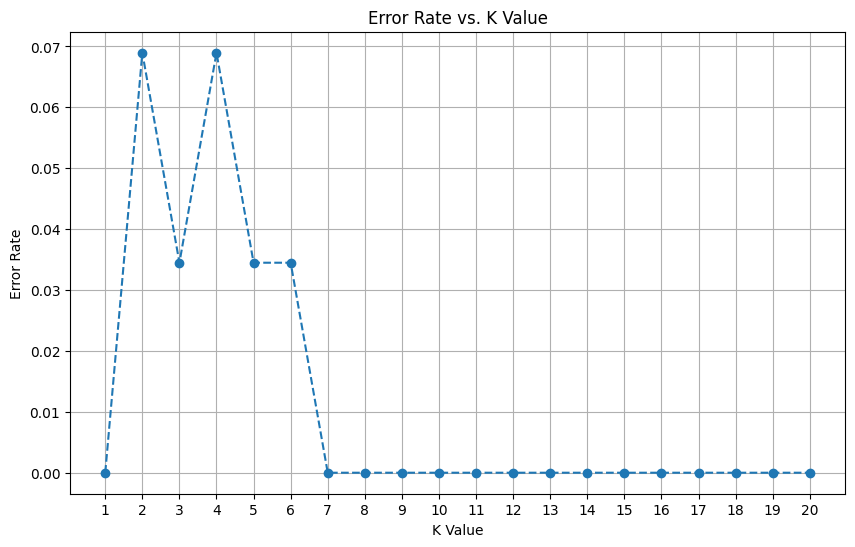

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

error_rates = []
k_values = range(1, 21) # Test k from 1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    error_rates.append(1 - accuracy_score(y_val, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [12]:
knn_euclidean = KNeighborsClassifier(n_neighbors=7, metric="euclidean")
knn_manhattan = KNeighborsClassifier(n_neighbors=7, metric="manhattan")
knn_cosine = KNeighborsClassifier(n_neighbors=7, metric="cosine")

knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_cosine.fit(X_train, y_train)


,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'cosine'
,metric_params,None
,n_jobs,None


In [13]:
knn_euclidean.predict(X_val.iloc[0:1, :])

array([1])

In [14]:
diagnosis = {0: "M", 1: "B"}

In [15]:
predictions = knn_euclidean.predict(X_val)

predictions_eu_sklearn = [diagnosis[0] if x == 0 else diagnosis[1] for x in predictions]
print(predictions_eu_sklearn)

['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']


In [16]:
models = {"Euclidean": knn_euclidean, "Manhattan": knn_manhattan, "Cosine": knn_cosine}

for model_name, model in models.items():
    print(f"KNN with {model_name} metrics.")
    prediction = model.predict(X_val)
    
    print("Diagnosis: ", end="")
    prediction_original = [diagnosis[0] if x == 0 else diagnosis[1] for x in prediction]
    print(prediction_original)
    print()

KNN with Euclidean metrics.
Diagnosis: ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']

KNN with Manhattan metrics.
Diagnosis: ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']

KNN with Cosine metrics.
Diagnosis: ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']



In [17]:
from sklearn.metrics import classification_report

y_pred = knn_euclidean.predict(X_val)

report = classification_report(y_val, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        23

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [18]:
from sklearn.metrics import classification_report

y_pred = knn_manhattan.predict(X_val)

report = classification_report(y_val, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        23

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [19]:
from sklearn.metrics import classification_report

y_pred = knn_cosine.predict(X_val)

report = classification_report(y_val, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        23

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



### **Model from scratch**

In [20]:
num_data = df.to_numpy()

num_data.shape

(569, 31)

In [21]:
num_data_train = num_data[:train_split]
num_data_test = num_data[train_split:]

num_data_train.shape, num_data_test.shape

((540, 31), (29, 31))

In [22]:
num_data_test = np.delete(num_data_test, 0, axis=1)
num_data_test.shape

(29, 30)

In [23]:
num_data_test[0]

array([1.154e+01, 1.444e+01, 7.465e+01, 4.029e+02, 9.984e-02, 1.120e-01,
       6.737e-02, 2.594e-02, 1.818e-01, 6.782e-02, 2.784e-01, 1.768e+00,
       1.628e+00, 2.086e+01, 1.215e-02, 4.112e-02, 5.553e-02, 1.494e-02,
       1.840e-02, 5.512e-03, 1.226e+01, 1.968e+01, 7.878e+01, 4.578e+02,
       1.345e-01, 2.118e-01, 1.797e-01, 6.918e-02, 2.329e-01, 8.134e-02])

In [24]:
# X, y = num_data[:, 1:], num_data[:, :1]
# X.shape, y.shape

In [25]:
# X_train, X_val = X[:train_split], X[train_split:]
# y_train, y_val = y[:train_split], y[train_split:]

# X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [26]:
for i in num_data_train:
    print(i[1:])
    break

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [27]:
class KNNv1:
    def __init__(self, data, k=3):
        self.X_train = [row[1:] for row in data]
        self.y_train = [row[0] for row in data]
        self.k = k          # no. of neighbors

    def _euclidean_distance(self, x1, x2):
        return math.sqrt(sum((a - b) ** 2 for a, b in zip(x1, x2)))
    
    def predict(self, x):
        distances = []

        for x_train, y in zip(self.X_train, self.y_train):
            dist = self._euclidean_distance(x, x_train)
            distances.append((dist, y))
        
        distances.sort(key=lambda pair: pair[0])
        k_nearest_labels = [label for _, label in distances[:self.k]]

        label_counts = {}
        for label in k_nearest_labels:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1
        
        prediction = max(label_counts, key=label_counts.get)

        return int(prediction)
    
    def predict_multiple(self, x):
        return [self.predict(i) for i in x]
    

In [28]:
knn = KNNv1(num_data_train, k=7)
predictions = knn.predict_multiple(num_data_test)

In [29]:
diagnosis = {0: "M", 1: "B"}

In [30]:
predictions_eu_custom = [diagnosis[0] if x == 0 else diagnosis[1] for x in predictions]
print(f"Custom:     {predictions_eu_custom}")
print(f"SK Learn:   {predictions_eu_sklearn}")

Custom:     ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']
SK Learn:   ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B']


In [31]:
predictions_eu_sklearn == predictions_eu_custom

True